# 110.mnist dataset 손글씨 인식 - Basic Fully Connected Layer

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

np.random.seed(102)

In [0]:
# load mnist data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0][15]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

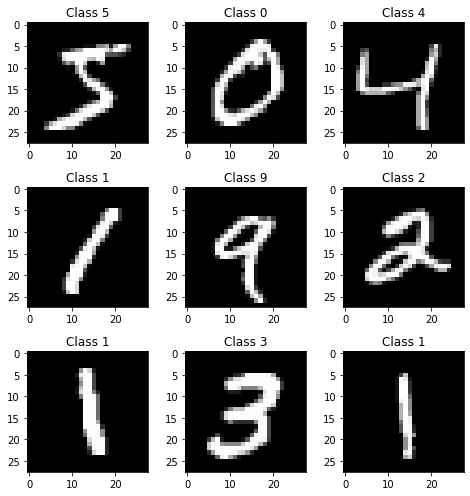

In [5]:
plt.figure(figsize=(7 ,7))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.tight_layout()

plt.show()

## Dense layer 의 input 으로 만들기 위해 28 X 28 을 784 로 flatten

In [6]:
X_train_scaled = X_train / 255.
X_test_scaled = X_test / 255.

X_train_scaled = X_train_scaled.reshape(-1, 784).astype("float32")
X_test_scaled  = X_test_scaled.reshape(-1, 784).astype("float32")

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


## Target label 을 one-hot format, i.e.

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]  
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]  
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]  
etc.

In [7]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(60000, 10)
(10000, 10)


## tf.data 를 이용한 shuffling and batch 구성

In [0]:
BATCH_SIZE = 128

train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(BATCH_SIZE)

In [9]:
for input, label in train_ds.take(1):
    print(input.shape, label.shape)

(128, 784) (128, 10)


In [0]:
N_NEURONS = 128
DROPOUT = 0.2
EPOCHS = 50

In [0]:
# 2 : Hidden Layers
model = tf.keras.Sequential()
model.add(layers.Dense(N_NEURONS, input_shape=(784,)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(DROPOUT))

model.add(layers.Dense(N_NEURONS))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(DROPOUT))

model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [14]:
import time
st = time.time()

history = model.fit(train_ds, epochs=EPOCHS, verbose=1, validation_data=test_ds)

et = time.time()
print(et - st)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4118 - accuracy: 0.8762 - val_loss: 0.1665 - val_accuracy: 0.9496
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1770 - accuracy: 0.9477 - val_loss: 0.1123 - val_accuracy: 0.9660
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1328 - accuracy: 0.9598 - val_loss: 0.0950 - val_accuracy: 0.9713
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1096 - accuracy: 0.9670 - val_loss: 0.0837 - val_accuracy: 0.9739
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0945 - accuracy: 0.9707 - val_loss: 0.0844 - val_accuracy: 0.9735
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0838 - accuracy: 0.9741 - val_loss: 0.0703 - val_accuracy: 0.9781
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0734 - accuracy: 0.9766 - val_loss: 0.0745 - val_accuracy: 0.9769
Epoch 

In [15]:
score = model.evaluate(test_ds, verbose=1)

79/79 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9810


In [16]:
print(model.metrics_names)
print("Test score : {:.2f}".format(score[0]))          # evaluation of loss function
print("Test accuracy :", score[1])

['loss', 'accuracy']
Test score : 0.08
Test accuracy : 0.9810000061988831


In [17]:
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
(predicted_classes == y_test).shape

(10000,)

In [0]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [20]:
print(correct_indices[:30])
print(incorrect_indices[:20])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 217  247  321  340  381  445  449  495  582  659  691  720  839  844
  947  951  956  965 1014 1039]


In [21]:
print(correct_indices.shape)
print(incorrect_indices.shape)

(9810,)
(190,)


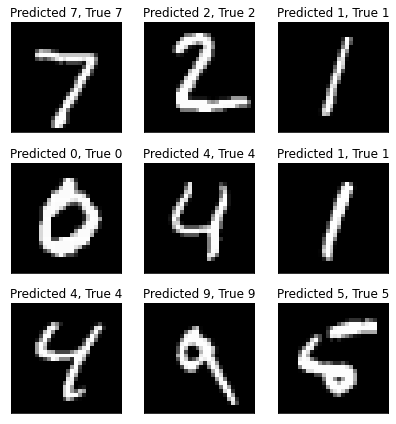

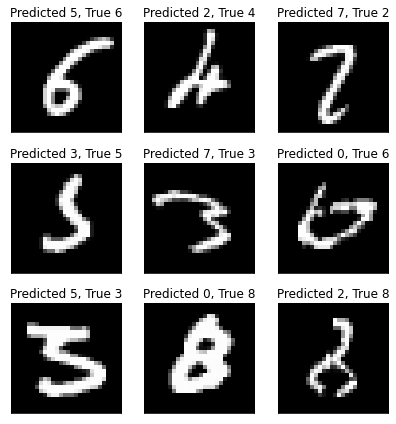

In [22]:
plt.figure(figsize=(6,6))

for i, idx in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title("Predicted {}, True {}".format(predicted_classes[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    
plt.figure(figsize=(6,6))
for i, idx in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title("Predicted {}, True {}".format(predicted_classes[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

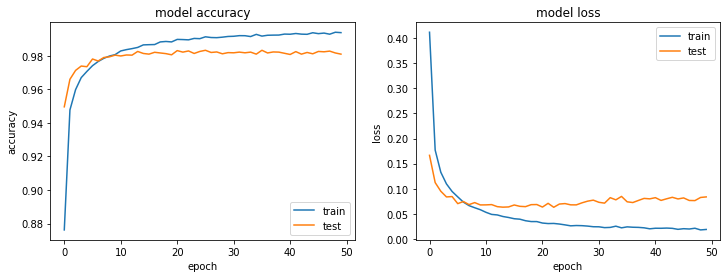

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test']);

- predict_classes( ) 와 predict( )

    - predict_classes 는 argmax 반환  
    - predict 는 확률 분포 반환

In [24]:
print(model.predict_classes(X_test_scaled[5].reshape((1,784))))
print(model.predict(X_test_scaled[5].reshape((1,784))))

[1]
[[1.7089049e-18 1.0000000e+00 8.2098863e-15 4.0675456e-19 1.2425463e-12
  7.8443147e-20 1.2185409e-16 2.8479365e-11 3.3974391e-16 3.5961855e-21]]


In [25]:
np.argmax(model.predict(X_test_scaled[5].reshape((1,784))))

1

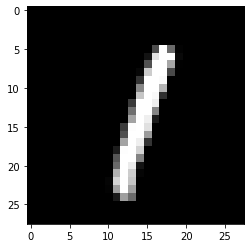

In [26]:
plt.imshow(X_test[5], cmap='gray')

# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

Label	Class

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [27]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

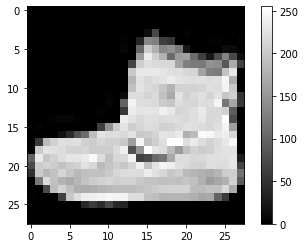

In [29]:
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

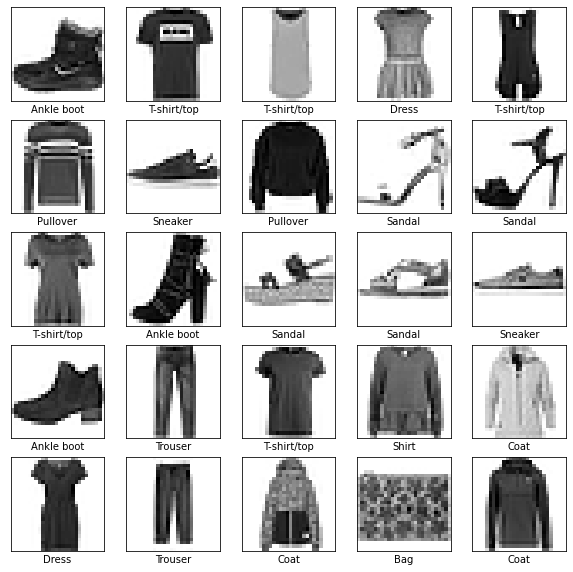

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

In [0]:
# Your code here